In [37]:
library(grpreg)
library(lars)

In [38]:
data(diabetes)
attach(diabetes)

The following object is masked _by_ .GlobalEnv:

    x

The following objects are masked from diabetes (pos = 4):

    x, x2, y

The following objects are masked from diabetes (pos = 5):

    x, x2, y



In [39]:
help(diabetes)

In [40]:
dim(diabetes$x)

[1] 442  10

In [41]:
group <- c(rep(1,4), rep(2,6))
par(mfrow=c(2,3))

In [42]:
group

[1] 1 1 1 1 2 2 2 2 2 2

In [43]:
help(grpreg)

In [44]:
fit <- grpreg(x, y, group, penalty="grLasso")

In [45]:
x = as.data.frame(x)
x = as.matrix(x)

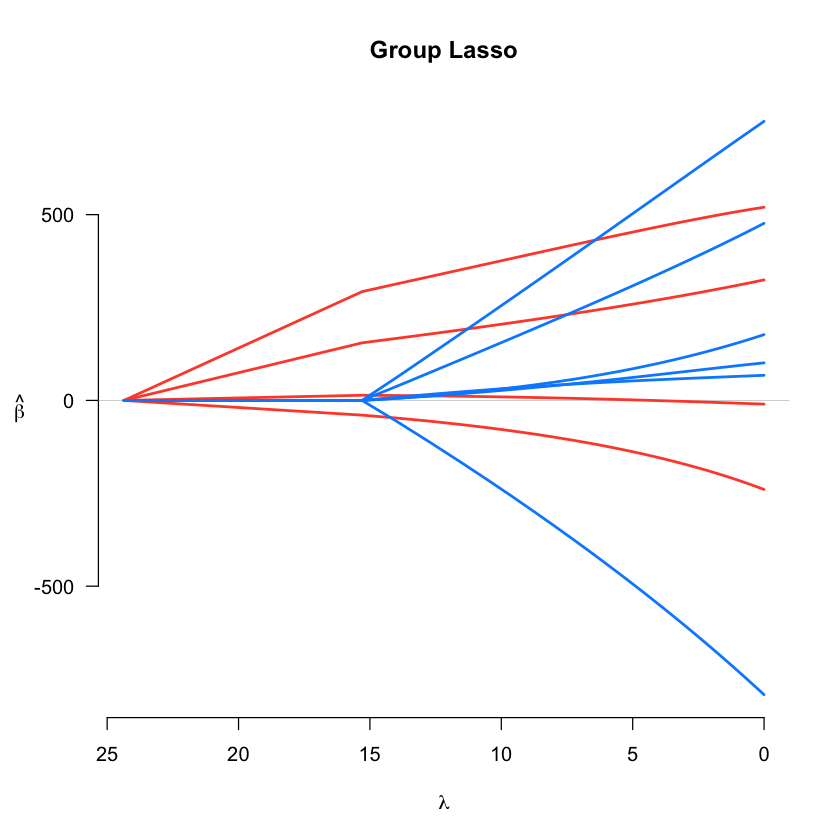

In [46]:
fit <- grpreg(x,y,group,penalty="grLasso")
plot(fit,main = "Group Lasso")

# Bi-level selection: Group exponential lasso

Bi-level means carrying out variable selection at the group level as well as the level of individual covariates (i.e., selecting important groups as well as important members of those groups)

Group selection selects important groups, and not members within the group – i.e., within a group, coefficients will either all be zero or all nonzero.


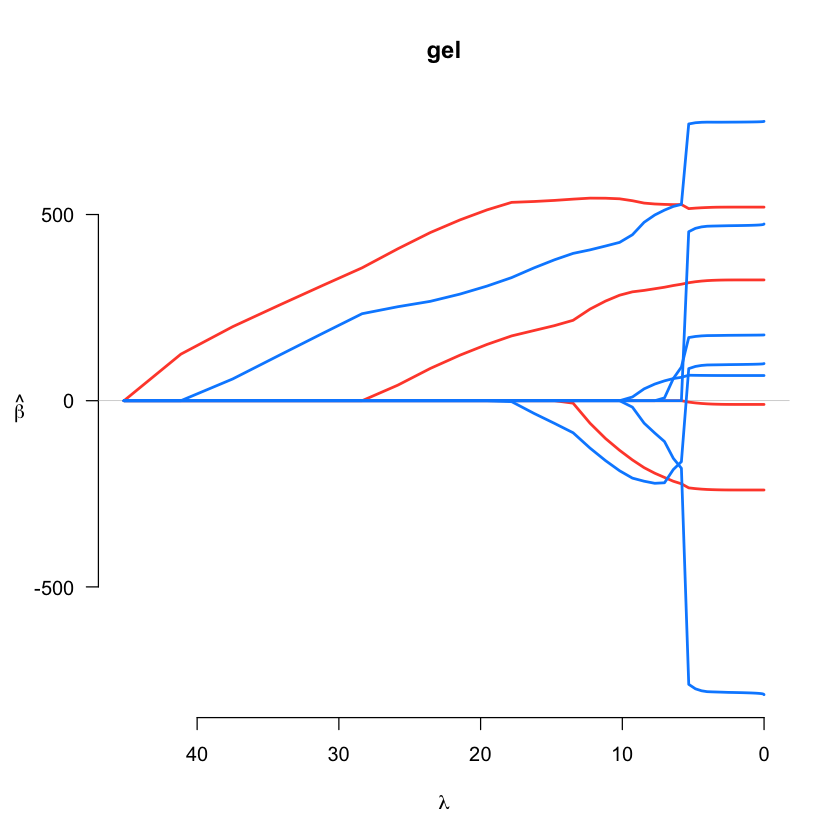

In [47]:
fit <- grpreg(x,y,group,penalty="gel") #Group exponential lasso
plot(fit, main ="gel")

However, especially when p is large compared with n, grpreg may fail to converge at low values of lambda, where models are nonidentifiable or nearly singular. Often, this is not the region of the coefficient path that is most interesting.

In [48]:
res <- select(fit, criterion = "AIC")
res$lambda

[1] 7.71041

In [49]:
# cross-validation
# default penalty is grLasso
par(mfrow=c(1,2))

cvfit <- cv.grpreg(x, y, group, seed =12345)

In [50]:
# lambda based on minimum cv error rule
cvfit$lambda.min
cvfit$cve
cvfit$cvse

[1] 0.8553018

[1] 4849.051 4619.877 4429.526 4259.183 4088.922 3930.776 3802.237 3695.627
  [9] 3603.891 3519.455 3444.094 3381.873 3331.011 3289.377 3253.451 3221.185
 [17] 3191.398 3165.051 3143.072 3125.169 3109.803 3095.697 3084.124 3074.646
 [25] 3066.088 3058.679 3052.912 3048.625 3045.271 3042.656 3040.820 3039.663
 [33] 3038.836 3038.279 3037.937 3037.740 3037.688 3037.698 3037.807 3037.965
 [41] 3038.136 3038.288 3038.441 3038.583 3038.741 3038.900 3039.068 3039.235
 [49] 3039.410 3039.579 3039.738 3039.890 3040.035 3040.172 3040.302 3040.423
 [57] 3040.538 3040.642 3040.715 3040.804 3040.919 3041.021 3041.131 3041.205
 [65] 3041.265 3041.331 3041.389 3041.441 3041.489 3041.532 3041.572 3041.608
 [73] 3041.641 3041.672 3041.700 3041.725 3041.748 3041.769 3041.789 3041.807
 [81] 3041.823 3041.838 3041.851 3041.863 3041.875 3041.885 3041.894 3041.903
 [89] 3041.911 3041.918 3041.924 3041.930 3041.935 3041.940 3041.945 3041.949
 [97] 3041.953 3041.956 3041.959 3041.962

[1] 251.1474 239.9796 230.9830 222.5987 214.7601 207.8308 202.5349 198.5154
  [9] 195.6718 193.1865 191.1245 189.6493 188.6506 187.9175 187.2725 186.5203
 [17] 185.8864 185.2026 184.7415 184.4619 184.2975 184.1537 184.1128 184.1503
 [25] 184.1939 184.2598 184.4029 184.6148 184.8454 185.0857 185.3377 185.6247
 [33] 185.8995 186.1617 186.4124 186.6471 186.8710 187.0701 187.2575 187.4312
 [41] 187.5885 187.7274 187.8560 187.9745 188.0841 188.1850 188.2780 188.3631
 [49] 188.4430 188.5156 188.5821 188.6431 188.6990 188.7503 188.7972 188.8401
 [57] 188.8795 188.9159 188.9479 188.9795 189.0104 189.0383 189.0644 189.0879
 [65] 189.1083 189.1278 189.1452 189.1611 189.1755 189.1887 189.2007 189.2117
 [73] 189.2217 189.2308 189.2391 189.2467 189.2536 189.2599 189.2656 189.2709
 [81] 189.2756 189.2800 189.2839 189.2876 189.2908 189.2938 189.2966 189.2991
 [89] 189.3013 189.3034 189.3053 189.3070 189.3086 189.3100 189.3113 189.3125
 [97] 189.3136 189.3146 189.3155 189.3163

grLasso-penalized linear regression with n=442, p=10
At minimum cross-validation error (lambda=0.8553):
-------------------------------------------------
  Nonzero coefficients: 10
  Nonzero groups: 2
  Cross-validation error of 3037.69
  Maximum R-squared: 0.49
  Maximum signal-to-noise ratio: 0.95
  Scale estimate (sigma) at lambda.min: 55.115

(Intercept)       x.age       x.sex       x.bmi       x.map        x.tc 
 152.133484   -7.846498 -218.000252  510.065308  312.074489 -737.138592 
      x.ldl       x.hdl       x.tch       x.ltg       x.glu 
 446.019925   94.637976  158.015425  709.109947   65.128497

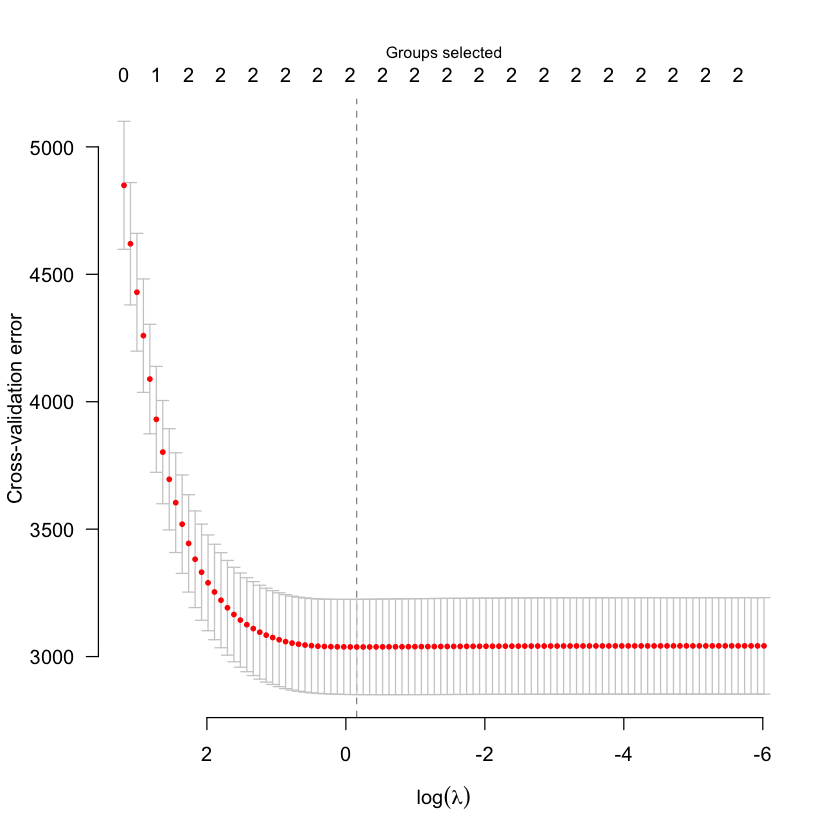

In [51]:
plot(cvfit)
summary(cvfit)
coef(cvfit) ## Beta at minimum CVE

# Sparse group lasso


In [ ]:
library(SGL) # sparse group lasso, similar as elastic net.

data <- list(x=x, y=y)
index <- c(rep(1,4), rep(2,6))
fit <- SGL(data, index, type = "linear")

In [53]:
# somehow much slower than cv.grpreg
cvFit <- cvSGL(data, index, type = "linear", nfold = 10)

In [56]:
cvFit$fit$beta

0,0.00000,0.0000,0.0000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
0,0.00000,0.0000,0.0000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,-0.3597595,-33.32297,-62.299784,-87.62544,-109.46171,-127.47006,-142.80813,-155.89798
0,124.38009,204.7666,273.4270,324.23300,366.4426,398.73332,423.15803,443.51822,460.57899,474.93136,487.0401,497.2272009,501.74218,504.678475,506.54444,508.03257,510.55246,512.84552,514.85909
0,0.00000,0.0000,0.0000,29.21093,59.4191,87.03035,111.78995,133.52838,152.49488,168.96689,183.2238,195.5913743,213.74188,228.758064,241.16778,251.87367,261.04291,268.94105,275.71603
0,0.00000,0.0000,0.0000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000000,0.00000,0.000000,0.00000,0.00000,-4.23830,-34.42330,-50.45989
0,0.00000,0.0000,0.0000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000000,0.00000,0.000000,0.00000,0.00000,-10.33131,0.00000,0.00000
0,0.00000,0.0000,0.0000,0.00000,0.0000,-13.69609,-36.85795,-57.64999,-76.07973,-92.27114,-106.4066,-118.8041118,-142.12549,-162.363150,-179.85488,-195.00845,-207.07315,-207.75408,-211.90013
0,0.00000,0.0000,0.0000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
0,32.12519,117.0829,189.6482,243.63120,288.2011,321.82022,347.04053,368.20161,385.97978,400.94400,413.5646,424.2556648,432.21139,437.590609,441.06773,443.92100,450.45467,467.01225,477.50991
0,0.00000,0.0000,0.0000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000000,0.00000,4.308504,11.24631,17.25614,24.52413,31.24058,37.09764


In [57]:
cvFit$lambdas

[1] 2.0457558 1.7473445 1.4924619 1.2747587 1.0888116 0.9299883 0.7943323
 [8] 0.6784642 0.5794977 0.4949672 0.4227671 0.3610987 0.3084258 0.2634361
[15] 0.2250091 0.1921874 0.1641533 0.1402085 0.1197565 0.1022878

In [54]:
help(SGL)

# Reference

The materials used in this demo are from 
http://www.biostat.umn.edu/~weip/course/dm/examples/exampleforhighd1.R

If you are interested in more different group lasso algorithms, you can go through all the example there, which is optional.

For all the penalty used in the grprep library, can be found 

https://cran.r-project.org/web/packages/grpreg/vignettes/penalties.pdf

for example,
* Minimax Concave Penalty (MCP)
* Smoothly clipped absolute deviation(SCAD)

